## Chapter 3 - Classification

### Setup

In [1]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

2023-07-02 15:03:58.314325: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-07-02 15:03:59.232082: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 15:03:59.232414: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-02 15:03:59.232895: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-07-02 15:03:59.242374: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node ze

Num GPUs Available:  1


2023-07-02 15:03:59.654259: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-02 15:03:59.654279: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2023-07-02 15:03:59.654284: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2023-07-02 15:03:59.654432: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-02 15:03:59.654579: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-02 15:03:59.654687: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-

### Imports

In [2]:
import sys
import sklearn
import numpy as np
import pandas as pd
import os 

# For plotting 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

/home/dlugano/.conda/envs/deeplearning/lib/python3.9/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist ["data"], mnist ["target"]
print("X= ", X.shape)
print("y= ", y.shape)

X=  (70000, 784)
y=  (70000,)


There are 70K images and each image has 784 features -> 28x28 pixels.

Each feature represent a pixel intensity, from 0 (white) to 255 (black)

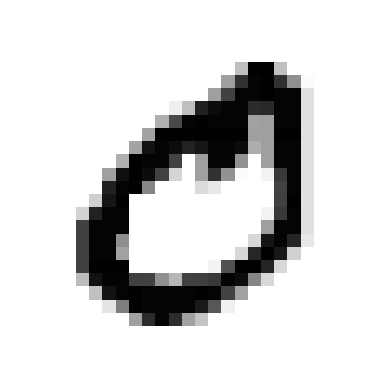

The label is y= 0


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[21]
some_digit_image=some_digit.reshape(28,28)  # Reshape the vector to an 28x28 array

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("The label is y=", y[21])

In [6]:
y=y.astype(np.uint8)    ## Cast y to an integer

In [7]:
# The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

A detector that is capable of distinguish between just two classes, something and NOT something. For example a 0 detector

In [8]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

We pick the Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time.

But, **How SGDClassifier makes its classification decisions?** For each instance, it computes a score based on a decision function. If that score is greater than a threshold, it assigns the instance to the positive class; otherwise it assigns it to the negative class.

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

##### Measuring accuracy using Cross-Validation

In [11]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [12]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

In [13]:
display_scores(score)

Scores: [0.9854 0.9847 0.9865]
Mean: 0.9855333333333333
Standard deviation: 0.0007408703590297707


In [14]:
from sklearn.base import BaseEstimator

class Never0Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [15]:
never_0_clf = Never0Classifier()
score=cross_val_score(never_0_clf, X_train, y_train_0, cv=3, scoring="accuracy")
display_scores(score)

Scores: [0.9003  0.9035  0.90005]
Mean: 0.9012833333333333
Standard deviation: 0.0015707393871111054


It has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets.

### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B.

To compute the confusion matrix, you first need to have a set of predictions so that they can be compared to the actual targets.

In this case, instead of using the test set, we can use the cross_val_predict(). This function performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

In [17]:
##function provided by Scikit-learn's website in order to plot a confusion matrix

import matplotlib.pyplot as plt
import itertools
import numpy as np

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

Confusion matrix, without normalization
[[53486   591]
 [  277  5646]]


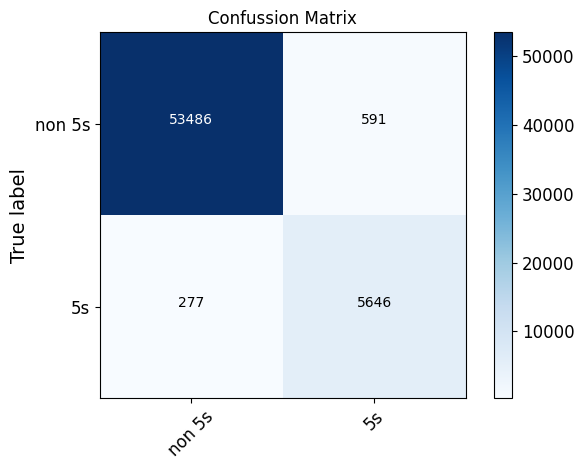

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_0, y_train_pred)
cm_plot_labels=['non 5s', '5s']

plot_confusion_matrix(cm=cm , classes=cm_plot_labels, title='Confussion Matrix')

## Precision and Recall

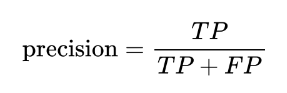
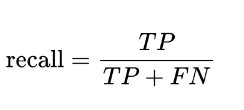

Precision is the accuracyy of the positive predicitions. 

Recall is also called sensitivity or true positive rate: the ratio of positive instances that are correctly detected by the classifier

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall trade-off.

In [19]:
from sklearn.metrics import precision_score, recall_score
print( "Precision score = " ,precision_score(y_train_0, y_train_pred))
print( "Recall score = " ,recall_score(y_train_0, y_train_pred))

Precision score =  0.9052429052429053
Recall score =  0.9532331588721932


F1 score combines precision and recall into a single metric : 

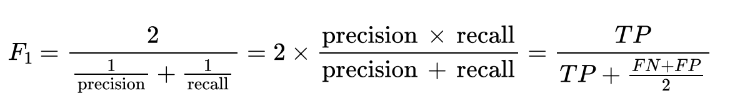


In [20]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9286184210526315

## Precision/Recall Trade-off

In the following image we can see how raising the threshold increase the precision and reduce the recall and viceversa.

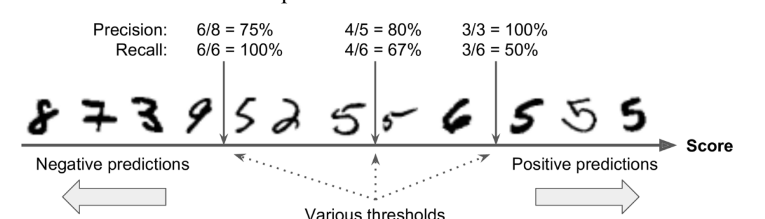

How do you decide which threshold to use? First, use the cross_val_predict() function to get the scores of all instances in the training set, but this time specify that you want to return decision scores instead of predictions:

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3, method="decision_function")

With these scores, use the precision_recall_curve() function to compute precision and recall for all possible thresholds:

In [22]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

Saving figure precision_recall_vs_threshold_plot


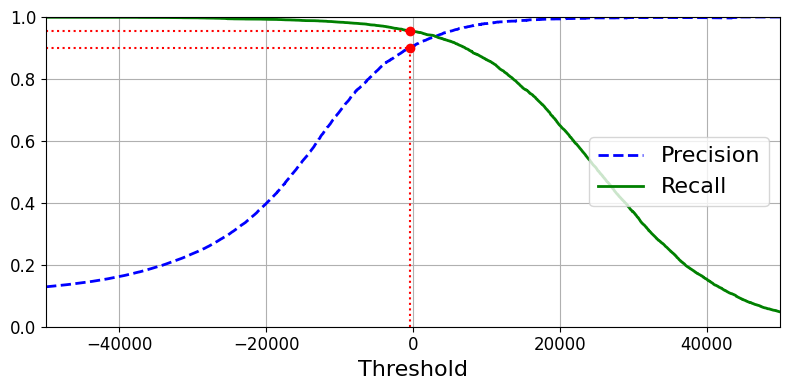

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

Another way to select a good precision/recall trade-off is to plot precision directly against recall:

Saving figure precision_vs_recall_plot


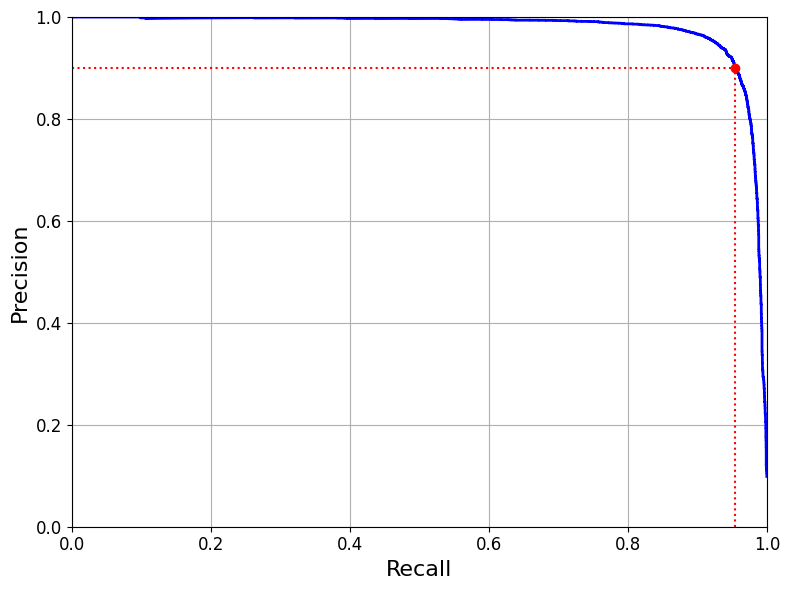

In [24]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

For example, if you want to go for a 95% prediction, you can search the lowest threshold that gives you at least 95%.

In [25]:
threshold_95_precision = thresholds[np.argmax(precisions >= 0.95)]
print(threshold_95_precision)

4505.5537993279995


In [26]:
y_train_pred_95 = (y_scores >= threshold_95_precision)
print("Precision score", precision_score(y_train_0, y_train_pred_95))
print("Recall Score", recall_score(y_train_0, y_train_pred_95))


Precision score 0.9501039501039501
Recall Score 0.9258821543136924


## The ROC Curve (receiver operating charasteristic)

The ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR).

In [27]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

Saving figure roc_curve_plot


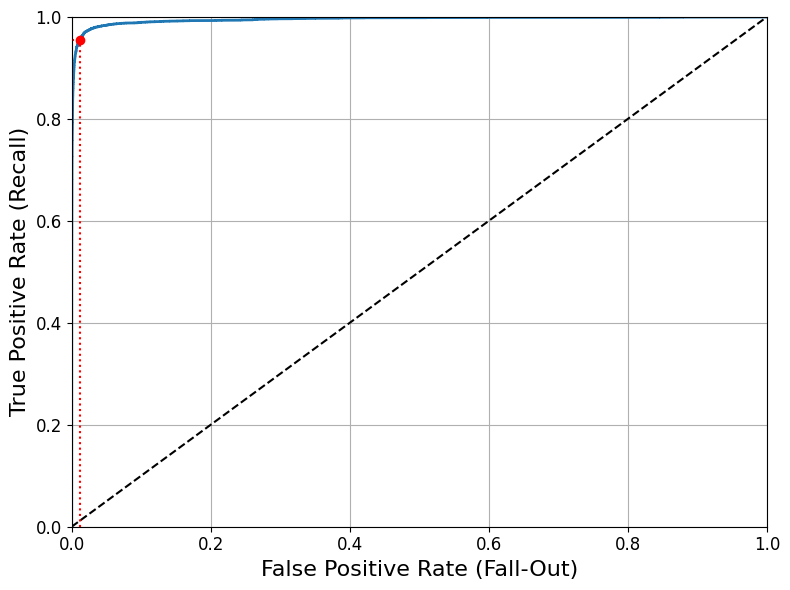

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [29]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9951089652363219

Let’s now train a RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier.

The RandomForestClassifier class does not have a decision_function() method. Instead, it has a predict_proba() method.

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3, method="predict_proba")

The roc_curve() function expects labels and scores, but instead of scores you can give it class probabilities. Let’s use the positive class’s probability as the score:

In [31]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forests = roc_curve(y_train_0, y_scores_forest)

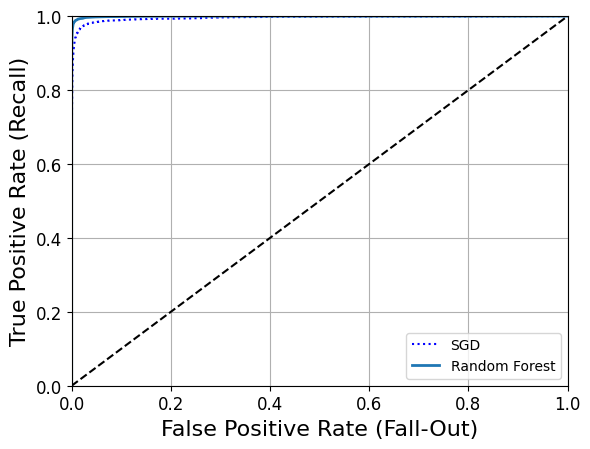

In [32]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(y_train_0, y_scores_forest)

0.9994553136100529

In [34]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3)

In [35]:
print("Precision score", precision_score(y_train_0, y_train_pred_forest))
print("Recall Score", recall_score(y_train_0, y_train_pred_forest))

Precision score 0.9925611052072264
Recall Score 0.9461421576903596


## Multiclass Classification

SVC (C-Support Vector Classification) is a OnevsOne classifier (OvO), in this case where we have 10 classesm, it traines 45 binary classifiers, it gets their decision scores for the image and selects the class that won the most duels.

In [39]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [40]:
svm_clf.predict([some_digit])

array([0], dtype=uint8)

In [41]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[[ 9.29838234  7.09167958  3.82972099  1.79572006  5.8885703   0.7913911
   2.80027801  8.10392157 -0.22656281  4.83753243]]


We can create a multiclass classifier using OvR strategy based on an SVC:

In [55]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([some_digit])

array([0], dtype=uint8)

Training an SGDClassifier to multiple classes:

In [56]:
sgd_clf.fit(X_train[:2000], y_train[:2000])
sgd_clf.predict([some_digit])

array([0], dtype=uint8)

In [45]:
sgd_clf.decision_function([some_digit])

array([[ 2329291.01037167, -6401525.99038459, -4943483.35279465,
        -4913306.60113609, -7187843.80069539, -2336981.76788085,
        -9444957.80179617, -5133765.154759  , -6064434.70501259,
        -2221658.57486554]])

In [57]:
cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv=3, scoring="accuracy")

array([0.84857571, 0.80809595, 0.84084084])

It can do much better by simply scalling the imputs

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[:2000].astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train[:2000], cv=3, scoring="accuracy")

array([0.85907046, 0.8185907 , 0.85435435])

It is important to account that we haven't trained in all the data, in that case precision would increment

## Error Analysys

Confusion matrix, without normalization
[[178   0   2   1   0   8   1   0   1   0]
 [  0 196   2   0   1   5   1   2  13   0]
 [  4   3 166   0   5   1   4   5   8   2]
 [  1   1  10 154   0  10   1   5   6   3]
 [  1   1   5   1 183   0   5   1   4  13]
 [  3   1   3  10   7 130   5   4  11   6]
 [  4   2   3   0   4   3 181   0   3   0]
 [  2   2   3   3   7   0   0 194   2  11]
 [  2   6   5   4   1   9   1   1 136   7]
 [  4   0   3   4  10   3   0  15   1 170]]


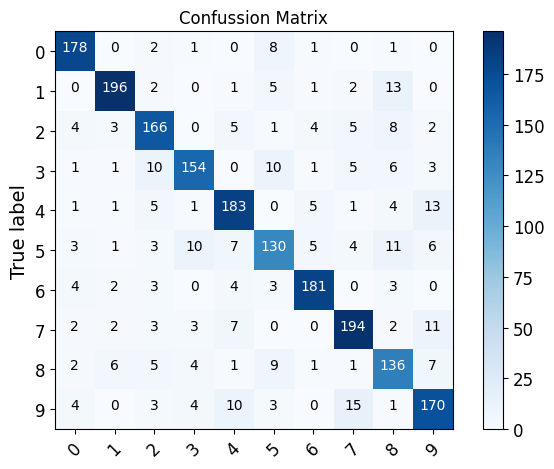

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train[:2000], cv=3)
conf_mx = confusion_matrix(y_train[:2000], y_train_pred)

cm_plot_labels=['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=conf_mx , classes=cm_plot_labels, title='Confussion Matrix')


To focus on the kind of errors the classifier makes, we need to divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute numbers of errors

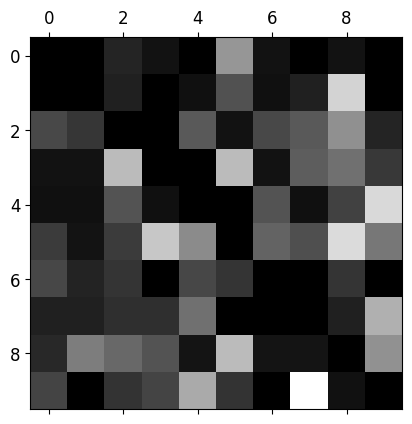

In [62]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Rows represent actual classes, while columns represent predicted classes.

Seeing this graphic, we can see that the most white pixel represent the 9s being classified as 7s.

Most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did. The reason is that we used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class.

## Multilabel Classification

Is when your classifier output multiple classes for each instance. For example a face-recognition classifier: what should it do if it recognizes several people in the same picture? It should attach one tag per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie.

## Multioutput Classification 
It is simply a generalization of multilabel classification where each label can be multiclass.

To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean
digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.

In [71]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [73]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

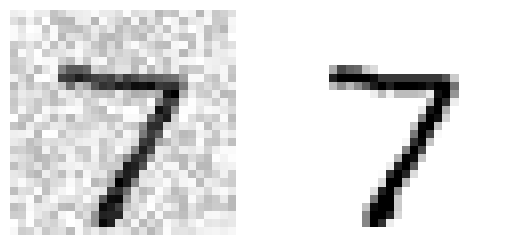

In [74]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

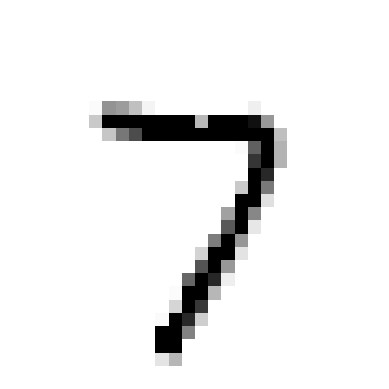

In [78]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)